# Covid-19 Hackathon 
## Importing Libraries
we have loaded only packages like numpy , pandas and matplotlib. Numpy for array,Pandas for Data frame and matplotlib for Data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

/Users/santoshsaxena/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Loading the Processed dataset

In [2]:
country = pd.read_csv("Desktop/Covid-19.csv/countrywise cases.csv")
state = pd.read_csv("Desktop/Covid-19.csv/state wise cases.csv")
total = pd.read_csv("Desktop/Covid-19.csv/statewise total case.csv")
code = pd.read_csv("Desktop/Covid-19.csv/state name with code.csv")

In [3]:
country.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [4]:
state.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,79,0,1.0,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
1,14-Mar-20,Recovered,9,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
2,14-Mar-20,Deceased,2,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,28,0,0.0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
4,15-Mar-20,Recovered,4,0,0.0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


In [5]:
total.head()

,State,ConfirmeConfirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths
0,Total,9075,1061,303,7711,12/04/2020 20:30:24,TT,623,89,14
1,Maharashtra,1895,208,127,1560,12/04/2020 14:35:24,MH,134,0,0
2,Tamil Nadu,1075,50,11,1014,12/04/2020 18:10:24,TN,106,6,1
3,Delhi,1154,28,24,1102,12/04/2020 20:30:25,DL,85,1,5
4,Telangana,503,96,14,393,11/04/2020 22:10:24,TG,0,0,0


# Prediction at National level
## Data Visualization

In [45]:
India=[[],[],[]]
India[0] = list(country["Total Confirmed"])
India[1] = list(country["Total Recovered"])
India[2] = list(country["Total Deceased"])

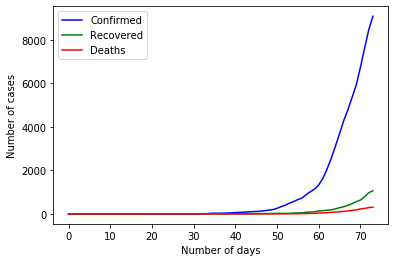

In [46]:
sr=[]
for i in range(74):
    sr.append(i)
plt.plot(sr,India[0] , c= "blue",label = "Confirmed")
plt.plot(sr,India[1] , c= "green",label = "Recovered")
plt.plot(sr,India[2] , c= "red",label = "Deaths")
plt.xlabel("Number of days")
plt.ylabel("Number of cases")
plt.legend()

In [47]:
dif = [[],[],[]]
for i in range(len(India[0])-1):
    dif[0].append(India[0][i+1] - India[0][i])
    dif[1].append(India[1][i+1] - India[1][i])
    dif[2].append(India[2][i+1] - India[2][i])

### As you can see this graph contains exponential parameter with some peak

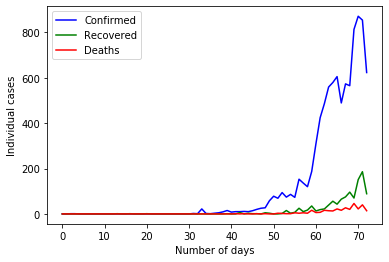

In [49]:
#del(sr[73])
plt.plot(sr,dif[0] , c= "blue",label = "Confirmed")
plt.plot(sr,dif[1] , c= "green",label = "Recovered")
plt.plot(sr,dif[2] , c= "red",label = "Deaths")
plt.xlabel("Number of days")
plt.ylabel("Individual cases")
plt.legend()

### Calculation of Stages
####we will calculate the stages on digit based classifier because after multipling with conditional probablity
####stage1 = 10 , stage2 = 100 , stage3 = 1000 , stage4 = 10000 and so on

In [41]:
India[0]

[1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 6,
 28,
 30,
 31,
 34,
 39,
 48,
 63,
 71,
 81,
 91,
 102,
 112,
 126,
 146,
 171,
 198,
 256,
 334,
 403,
 497,
 571,
 657,
 730,
 883,
 1019,
 1139,
 1326,
 1635,
 2059,
 2545,
 3104,
 3683,
 4288,
 4777,
 5350,
 5915,
 6728,
 7599,
 8453,
 9076]

In [51]:
stage1 = []
stage2 = []
stage3 = []
stage4 = []
stage5 = []
for i in range(len(India[0])):
    if(India[0][i]/10 < 1):
        stage1.append(India[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 < 1):
        stage2.append(India[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 >1 and India[0][i]/1000 < 1 ):
        stage3.append(India[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 >1 and India[0][i]/1000 > 1 and India[0][i]/10000 < 1):
        stage4.append(India[0][i])
    else:
        stage5.append(India[0][i])

In [57]:
print(len(stage1))
print(len(stage2))
print(len(stage3))
print(len(stage4))
print(len(stage5))

34
10
14
16
0


#Converting all list with same index

In [58]:
def serial(x):
    sr=[]
    for i in range(x):
        sr.append(i)
    return sr

### Because the least number in the list in 10 hence we need to convert all list into 10
### Calculating the parameters on the basis of stages and finding the relation between them

In [373]:
parameter = [] # All the important parameter will be stored in this list

In [400]:
def Regression(x,y):
    ja=[]
    p=[]
    i=0
    while(i<1000):
        for j in range(10):
            suma = 0.1 * j + i
            result = 0
            p.append(suma)
            for k in range(len(x)):
                h = suma*x[k]
                temp = y[k] - h
                if(temp < 0):
                    temp = -1*temp
                temp1.append(temp)
                result = result + temp
                result1.append(result)
            ja.append(result)
        i = i+1
    for i in range(len(ja)):
        if(ja[i] == min(ja)):
            index = p[i]
    ypred = []
    for i in range(len(x)):
        h = index *x[i]
        ypred.append(h)
    plt.scatter(x,y,color = "blue")
    plt.plot(x,ypred , color = "red")
    plt.xlabel("Number of days")
    plt.ylabel("Number of Cases")
    return index

In [375]:
stage = [stage1,stage2,stage3,stage4]
sr = serial(10)

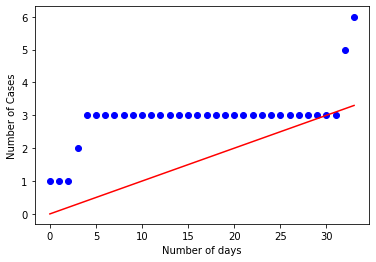

In [376]:
sr = serial(len(stage[0]))
parameter.append(Regression(sr,stage[0]))

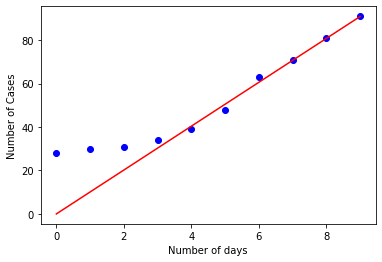

In [377]:
sr = serial(len(stage[1]))
parameter.append(Regression(sr,stage[1]))

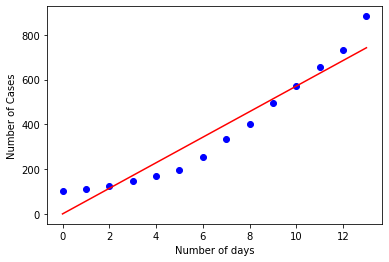

In [378]:
sr = serial(len(stage[2]))
parameter.append(Regression(sr,stage[2]))

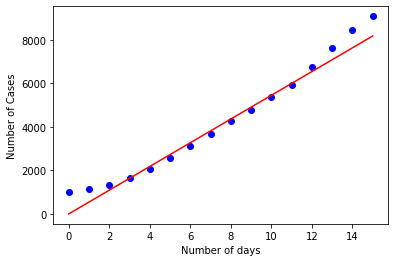

In [379]:
sr = serial(len(stage[3]))
parameter.append(Regression(sr,stage[3]))

In [380]:
parameter

[0.1, 10.1, 57.1, 544.7]

### With the help of this parameter we will find the relation between the stages

In [381]:
relation = [] # All the coefficients of all stages with respect to stage 1

In [382]:
for i in range(4):
    relation.append(parameter[i]/parameter[0])

In [383]:
relation

[1.0, 100.99999999999999, 571.0, 5447.0]

we achieved the actual parameters of all the stages with respect to stage 1

In [397]:
parameter

[0.1, 10.1, 57.1, 544.7]

In [398]:
len(India[0])

74

That is Why i not found the values all at one. Hence sklearn is not used because i want multiple coeffiecients of different stages

7.7

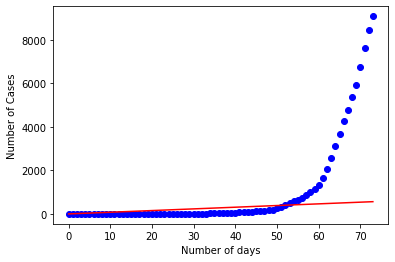

In [401]:
sr = serial(len(India[0]))
Regression(sr , India[0])

In [402]:
print("The parameter of stages are = " , parameter)
print("All stages relation with respect to stage 1 = " , relation)

The parameter of stages are =  [0.1, 10.1, 57.1, 544.7]
All stages relation with respect to stage 1 =  [1.0, 100.99999999999999, 571.0, 5447.0]


###Conclusion for stages calculated with the help of machhine learning
####stage1 = stage1
####stage2 = 100*stage1
####stage3 = 500*stage1
####stage4 = 5000*stage1
####This is the approximate relation between all stages with respect to stage 1
####As stage increases the rate of infection will increase in this manner

## Calculating the Levels to find A ∩ B 
#### Where A is a set of infected person and  B is a set of non infected person

In [403]:
dif

[[0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  1,
  22,
  2,
  1,
  3,
  5,
  9,
  15,
  8,
  10,
  10,
  11,
  10,
  14,
  20,
  25,
  27,
  58,
  78,
  69,
  94,
  74,
  86,
  73,
  153,
  136,
  120,
  187,
  309,
  424,
  486,
  559,
  579,
  605,
  489,
  573,
  565,
  813,
  871,
  854,
  623],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  6,
  0,
  3,
  1,
  1,
  0,
  5,
  3,
  0,
  0,
  2,
  15,
  3,
  7,
  25,
  10,
  17,
  35,
  13,
  19,
  22,
  39,
  56,
  43,
  65,
  75,
  96,
  70,
  151,
  186,
  89],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [404]:
st_dif1 = dif[0][0:len(stage1)]
st_dif2 = dif[0][len(stage1):len(stage1)+len(stage2)]
st_dif3 = dif[0][len(stage2):len(stage1)+len(stage2)+len(stage3)]
st_dif4 = dif[0][len(stage3):len(stage1)+len(stage2)+len(stage3)+len(stage4)]

In [411]:
parameter1=[]
st_dif = [st_dif1,st_dif2,st_dif3,st_dif4]

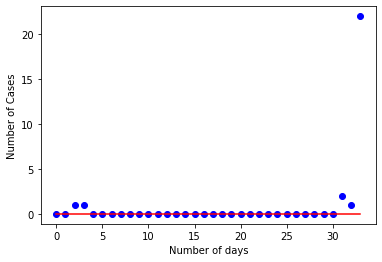

In [412]:
sr = serial(len(st_dif[0]))
parameter1.append(Regression(sr,st_dif[0]))

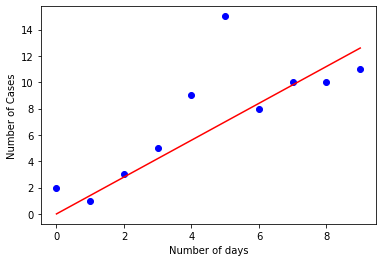

In [413]:
sr = serial(len(st_dif[1]))
parameter1.append(Regression(sr,st_dif[1]))

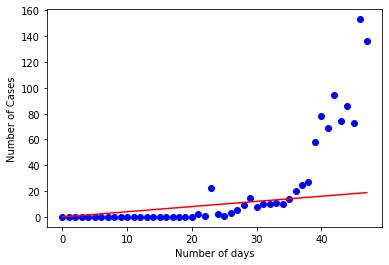

In [414]:
sr = serial(len(st_dif[2]))
parameter1.append(Regression(sr,st_dif[2]))

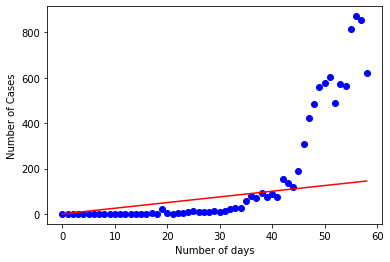

In [415]:
sr = serial(len(st_dif[3]))
parameter1.append(Regression(sr,st_dif[3]))

In [417]:
parameter1

[0.0, 1.4, 0.4, 2.5]

####In terms of levels the 3rd index is less because of Lockdown. i am purposefully printing dif2 and dif3 so that difference can be seen 
####After that it increases because of illegal gatherings 

In [422]:
st_dif2

[2, 1, 3, 5, 9, 15, 8, 10, 10, 11]

In [421]:
st_dif3

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 22,
 2,
 1,
 3,
 5,
 9,
 15,
 8,
 10,
 10,
 11,
 10,
 14,
 20,
 25,
 27,
 58,
 78,
 69,
 94,
 74,
 86,
 73,
 153,
 136]

####As Level 1 is 0 hence making relations with level2

In [429]:
relation1 = [0.0]
for i in range(4):
    relation1.append(parameter[i]/parameter[1])

In [438]:
relation1

[0.0, 1.0, 5.653465346534654, 53.93069306930694]

####Conclusions for Levels
####Level1 = 0
####Level2 = Level2
####Level3 = 5*Level2
####Level4 = 50*Level2
####This concepts is similar as for stages